In [1]:
import mlflow
runs = mlflow.search_runs(experiment_ids=["1"])

In [2]:
runs.columns

Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.max_accuracy', 'metrics.pmse_score',
       'metrics.wasserstein_score', 'params.epsilon', 'params.synthesizer',
       'params.pmse_synthesizer', 'params.wasserstein_epsilon',
       'params.wasserstein_synthesizer', 'params.pmse_epsilon',
       'tags.mlflow.user', 'tags.mlflow.source.type', 'tags.max_accuracy',
       'tags.mlflow.source.name', 'tags.dataset',
       'tags.mlflow.source.git.commit', 'tags.wasserstein', 'tags.pmse',
       'tags.mlflow.runName'],
      dtype='object')

In [3]:
from collections import Counter

c = Counter(runs['tags.max_accuracy'])
c.most_common()

[(None, 24),
 ('LogisticRegression', 9),
 ('MLPClassifier', 8),
 ('AdaBoostClassifier', 4),
 ('GaussianNB', 3),
 ('BaggingClassifier', 1)]

In [7]:
runs.loc[runs['tags.dataset'] == 'car']

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.max_accuracy,metrics.pmse_score,metrics.wasserstein_score,params.epsilon,...,params.pmse_epsilon,tags.mlflow.user,tags.mlflow.source.type,tags.max_accuracy,tags.mlflow.source.name,tags.dataset,tags.mlflow.source.git.commit,tags.wasserstein,tags.pmse,tags.mlflow.runName
24,01b044c02ef8447687fd846e7a8b518a,1,FINISHED,/mnt/c/Users/lurosenb/playground/whitenoise-sy...,2020-07-24 03:20:22.169000+00:00,2020-07-24 03:20:24.337000+00:00,NaN,259.177396,0.052271,None,...,100.0,lurosenb,LOCAL,None,main.py,car,34c2f228740cc7fe4444e08a19fb3030fcad3207,car,car,None
25,0497fa5e1fad42a0a6c6ea5c86926f80,1,FINISHED,/mnt/c/Users/lurosenb/playground/whitenoise-sy...,2020-07-24 03:20:22.116000+00:00,2020-07-24 03:20:24.337000+00:00,NaN,21.155700,0.044385,None,...,50.0,lurosenb,LOCAL,None,main.py,car,34c2f228740cc7fe4444e08a19fb3030fcad3207,car,car,None
26,d71444feb82745e38354514a323edc96,1,FINISHED,/mnt/c/Users/lurosenb/playground/whitenoise-sy...,2020-07-24 03:20:22.111000+00:00,2020-07-24 03:20:24.341000+00:00,NaN,187.460123,0.044314,None,...,0.1,lurosenb,LOCAL,None,main.py,car,34c2f228740cc7fe4444e08a19fb3030fcad3207,car,car,None
27,41a014c708764e5c9f034002fefbf583,1,FINISHED,/mnt/c/Users/lurosenb/playground/whitenoise-sy...,2020-07-24 03:20:22.098000+00:00,2020-07-24 03:20:24.339000+00:00,NaN,226.637459,0.043614,None,...,10.0,lurosenb,LOCAL,None,main.py,car,34c2f228740cc7fe4444e08a19fb3030fcad3207,car,car,None
28,ceaceffba8cd4cebadf8c71f07d082f0,1,FINISHED,/mnt/c/Users/lurosenb/playground/whitenoise-sy...,2020-07-24 03:20:22.057000+00:00,2020-07-24 03:20:24.339000+00:00,NaN,177.887586,0.044014,None,...,1.0,lurosenb,LOCAL,None,main.py,car,34c2f228740cc7fe4444e08a19fb3030fcad3207,car,car,None
29,abda8c9b6fd44255ac3e9c949ecf6440,1,FINISHED,/mnt/c/Users/lurosenb/playground/whitenoise-sy...,2020-07-24 03:20:22.022000+00:00,2020-07-24 03:20:24.342000+00:00,NaN,237.542271,0.044614,None,...,100.0,lurosenb,LOCAL,None,main.py,car,34c2f228740cc7fe4444e08a19fb3030fcad3207,car,car,None
30,67aec67df2ca4a01a31c82b6b0d85519,1,FINISHED,/mnt/c/Users/lurosenb/playground/whitenoise-sy...,2020-07-24 03:20:21.979000+00:00,2020-07-24 03:20:24.339000+00:00,NaN,16.151276,0.045114,None,...,100.0,lurosenb,LOCAL,None,main.py,car,34c2f228740cc7fe4444e08a19fb3030fcad3207,car,car,None
31,1351a8d3be8846f0b330557dc00d0390,1,FINISHED,/mnt/c/Users/lurosenb/playground/whitenoise-sy...,2020-07-24 03:20:21.859000+00:00,2020-07-24 03:20:24.339000+00:00,NaN,156.052631,0.048957,None,...,50.0,lurosenb,LOCAL,None,main.py,car,34c2f228740cc7fe4444e08a19fb3030fcad3207,car,car,None
32,4dfd9570eb724fe69e533f4db7eadb38,1,FINISHED,/mnt/c/Users/lurosenb/playground/whitenoise-sy...,2020-07-24 03:20:20.878000+00:00,2020-07-24 03:20:24.337000+00:00,NaN,648.145277,0.047085,None,...,0.1,lurosenb,LOCAL,None,main.py,car,34c2f228740cc7fe4444e08a19fb3030fcad3207,car,car,None
33,058757ef43744eb29ac013d2616cd5cc,1,FINISHED,/mnt/c/Users/lurosenb/playground/whitenoise-sy...,2020-07-24 03:20:20.868000+00:00,2020-07-24 03:20:24.343000+00:00,NaN,35.866360,0.047728,None,...,10.0,lurosenb,LOCAL,None,main.py,car,34c2f228740cc7fe4444e08a19fb3030fcad3207,car,car,None


In [5]:
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import conf

def gen_plot_dict(runs, x, y, series, x_label, y_label):
    """
    Will produce a accuracy-by-epsilon graph from an artifact.json
    file.
    """
    metrics = runs[[x,y,series]]
    
    plot_dict = {}
    
    for index, row in metrics.iterrows():
        if row[series] not in plot_dict:
            plot_dict[row[series]] = []
        if row[x] and row[y]:
            plot_dict[row[series]].append((float(row[x]),float(row[y])))
    
    print(plot_dict)
    return plot_dict

def gen_scatter_plot(plot_dict, plot_index, title, d):
    colors = ['--r','--b','--g', '--c', '--m', '--y']
    plt.figure(figsize=(12,8))
    for i, series in enumerate(plot_dict):
        X = []
        Y = []
        points = plot_dict[series]
        points.sort(key=lambda x: x[0])
        for x, y in points:
            X.append(x)
            Y.append(y)
        
        if series:
            plt.plot(X, Y, colors[i % len(colors)], label = series)
    plt.xscale("log")
    plt.legend()
    plt.title(title)
    plt.xlabel(d['x_label'])
    plt.ylabel(d['y_label'])
    plt.figure(plot_index)
    plt.show()

def make_plots(runs, plots):
    for i, p in enumerate(plots):
        plot_dict = gen_plot_dict(runs, **plots[p])
        gen_scatter_plot(plot_dict, i, p, plots[p])

{'mwem': [(1.0, 0.4166666666666667), (10.0, 0.6180555555555556), (100.0, 0.5555555555555556), (50.0, 0.27314814814814814), (0.1, 0.36342592592592593), (0.01, 0.4791666666666667)], 'dpgan': [(10.0, 0.6805555555555556), (0.1, 0.6759259259259259), (1.0, 0.4930555555555556), (0.01, 0.3055555555555556), (50.0, 0.6805555555555556), (100.0, 0.6805555555555556)], 'quail_dpgan': [(1.0, 0.5532407407407407), (0.1, 0.2962962962962963), (50.0, 0.6759259259259259), (0.01, 0.2361111111111111), (10.0, 0.6550925925925926), (100.0, 0.6851851851851852)], 'quail_mwem': [(0.01, 0.1712962962962963), (0.1, 0.32407407407407407), (50.0, 0.6921296296296297), (1.0, 0.6944444444444444), (10.0, 0.6805555555555556), (100.0, 0.6851851851851852)], None: [], 'real': [(0.0, 0.9699074074074074)]}


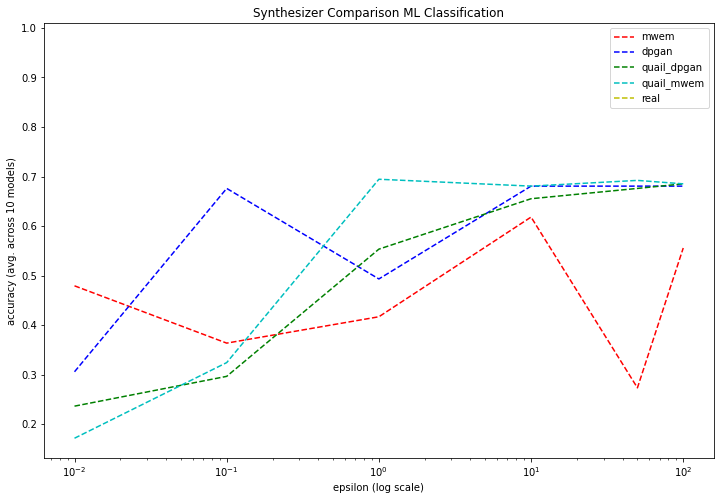

<Figure size 432x288 with 0 Axes>

{None: [], 'quail_dpgan': [(100.0, 259.17739561042526), (0.1, 187.46012277027432), (10.0, 226.6374589775664), (1.0, 177.8875863519476), (50.0, 156.0526306323064), (0.01, 328.69922667674143)], 'quail_mwem': [(50.0, 21.155699820987266), (100.0, 16.151276130019802), (0.1, 648.1452773699995), (10.0, 35.86635956870383), (0.01, 903.629607383208), (1.0, 25.005534007053882)], 'dpgan': [(100.0, 237.5422713308473), (0.1, 84.9631087806386), (50.0, 120.21883711871133), (0.01, 182.26692392895998), (10.0, 147.90724277187923), (1.0, 204.63388091888604)], 'mwem': [(0.01, 467.66228845856756), (10.0, 5.149936250111107), (1.0, 7.417079748503702), (50.0, 34.708351417032205), (100.0, 3.9851240965764774), (0.1, 6.005558110188294)]}


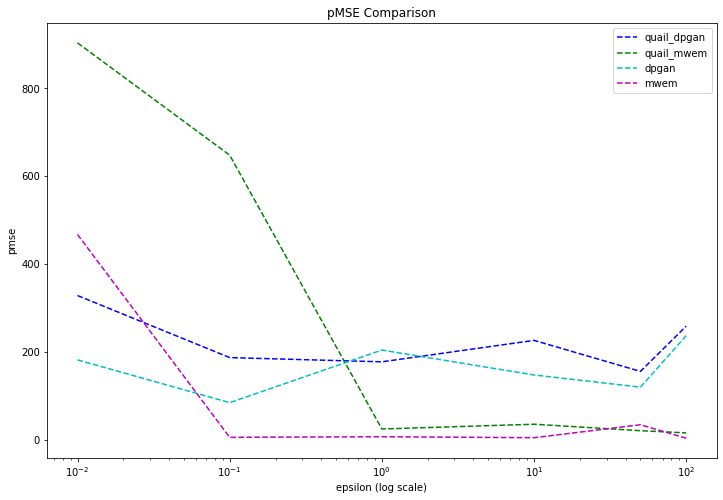

{None: [], 'mwem': [(1.0, 0.052271042721205065), (10.0, 0.04895679608561509), (0.01, 0.04708538248562511), (0.1, 0.04274255507148009), (100.0, 0.050699663978590076), (50.0, 0.04897103421419012)], 'quail_dpgan': [(50.0, 0.04438523641436511), (0.1, 0.04431384224289011), (100.0, 0.04361417045694511), (10.0, 0.04401391717827503), (1.0, 0.044613990871395066), (0.01, 0.047041602352941234)], 'quail_mwem': [(10.0, 0.045113953485590094), (50.0, 0.04541410457133017), (100.0, 0.04121402002861016), (0.1, 0.05359959942837509), (1.0, 0.04885685212842507), (0.01, 0.04331389795716512)], 'dpgan': [(0.1, 0.047728116842780076), (10.0, 0.055156682899725064), (50.0, 0.039542428035660104), (0.01, 0.04956265058823537), (1.0, 0.0472853810284351), (100.0, 0.04665679984988005)]}


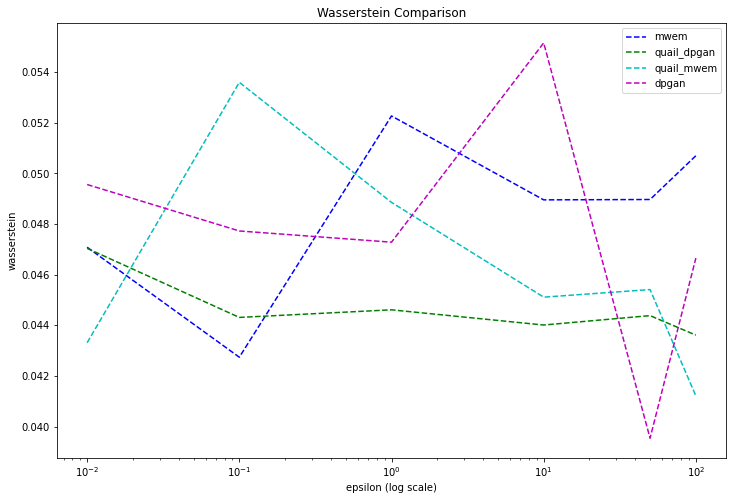

<Figure size 432x288 with 0 Axes>

In [6]:
make_plots(runs, 
           {"Synthesizer Comparison ML Classification": 
            {'x':'params.epsilon', 
             'y':'metrics.max_accuracy', 
             'series':'params.synthesizer', 
             'x_label': "epsilon (log scale)", 
             'y_label': "accuracy (avg. across 10 models)"},
            "pMSE Comparison": 
            {'x':'params.pmse_epsilon', 
             'y':'metrics.pmse_score', 
             'series':'params.pmse_synthesizer', 
             'x_label': "epsilon (log scale)", 
             'y_label': "pmse"},
            "Wasserstein Comparison": 
            {'x':'params.wasserstein_epsilon', 
             'y':'metrics.wasserstein_score', 
             'series':'params.wasserstein_synthesizer', 
             'x_label': "epsilon (log scale)", 
             'y_label': "wasserstein"}
           })